In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
#putting movies data on 'movies' dataframe
data = pd.read_csv('Superpowers.csv')

In [ ]:
data['Professional Bio'][0]

'👋Prior to attending Cornell Tech, Anton worked as a technical lead at a software startup in Oslo, building the company from 2 to 70 employees while completing his undergrad in CS at the University of Oslo. His primary expertise is building web applications using JavaScript, and he was a keynote speaker at JSConf 2019. During his time at Cornell Tech he has focused on expanding my skills into NLP and machine learning. He recently published a paper with the Social Technologies Lab where he collects and analyzes data related to polarization and political misinformation in social media. Currently working as an AI research intern at Dataminr, where he develops time series event detection models.'

##Cluster for multiple columns

In [ ]:
# combine coloumns
data['concat'] = data['Professional Bio'] + data['Core Teaming Objectives'] + data['Skillsets'] + data['Hobbies, Interests, etc']
# Pre-processing step: remove words like we'll, you'll, they'll etc.
data['concat'] = data['concat'].replace({"'ll": " "}, regex=True)
# Another Pre-preprocessing step: Removal of '-'
data['concat'] = data['concat'].replace({"-": " "}, regex=True)
# Remove all characters except numbers & alphabets
data['concat'] = data['concat'].replace({"[^A-Za-z0-9 ]+": ""}, regex=True)
# Another pre-processing
data['concat'] = data['concat'].fillna('')

In [ ]:
tfidf1 = TfidfVectorizer(stop_words='english')
#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
matrix1 = tfidf1.fit_transform(data['concat'])
#Output the shape of tfidf_matrix
matrix1.shape
#Output
(45466, 75827)

(45466, 75827)

Text(0, 0.5, 'SSE')

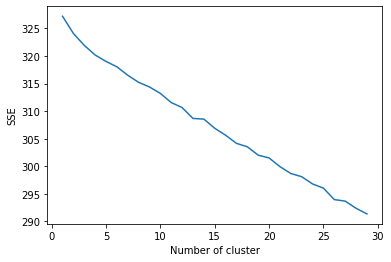

In [ ]:
import matplotlib.pyplot as plt
# Continuing after vectorization step
# data-structure to store Sum-Of-Square-Errors
sse = {}
# Looping over multiple values of k from 1 to 30
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(matrix1)
    data["clusters1"] = kmeans.labels_
    sse[k] = kmeans.inertia_
# Plotting the curve with 'k'-value vs SSE
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

In [ ]:
# true_k, derived from elbow method and confirmed from pluralsight's website
true_k1 = 16
# Running model with 15 different centroid initializations & maximum iterations are 500
model1 = KMeans(n_clusters=true_k1, init='k-means++', max_iter=500, n_init=15)
model1.fit(matrix1)

KMeans(max_iter=500, n_clusters=16, n_init=15)

## Cluster for single columns

In [ ]:
# Pre-processing step: remove words like we'll, you'll, they'll etc.
data['Professional Bio'] = data['Professional Bio'].replace({"'ll": " "}, regex=True)
# Another Pre-preprocessing step: Removal of '-'
data['Professional Bio'] = data['Professional Bio'].replace({"-": " "}, regex=True)
# Remove all characters except numbers & alphabets
data['Professional Bio'] = data['Professional Bio'].replace({"[^A-Za-z0-9 ]+": ""}, regex=True)
# Another pre-processing
data['Professional Bio'] = data['Professional Bio'].fillna('')

# Pre-processing step: remove words like we'll, you'll, they'll etc.
data['Hobbies, Interests, etc'] = data['Hobbies, Interests, etc'].replace({"'ll": " "}, regex=True)
# Another Pre-preprocessing step: Removal of '-'
data['Hobbies, Interests, etc'] = data['Hobbies, Interests, etc'].replace({"-": " "}, regex=True)
# Remove all characters except numbers & alphabets
data['Hobbies, Interests, etc'] = data['Hobbies, Interests, etc'].replace({"[^A-Za-z0-9 ]+": ""}, regex=True)
# Another pre-processing
data['Hobbies, Interests, etc'] = data['Hobbies, Interests, etc'].fillna('')

In [ ]:
tfidf2 = TfidfVectorizer(stop_words='english')
#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
matrix2 = tfidf2.fit_transform(data['Professional Bio'])
#Output the shape of tfidf_matrix
matrix2.shape
#Output
(45466, 75827)

(45466, 75827)

In [ ]:
tfidf3 = TfidfVectorizer(stop_words='english')
#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
matrix3 = tfidf3.fit_transform(data['Hobbies, Interests, etc'])
#Output the shape of tfidf_matrix
matrix3.shape
#Output
(45466, 75827)

(45466, 75827)

Text(0, 0.5, 'SSE')

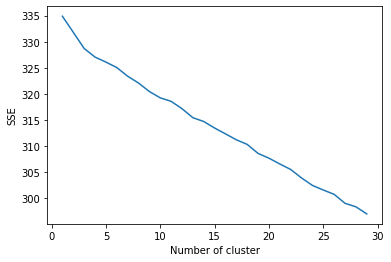

In [ ]:
sse = {}
# Looping over multiple values of k from 1 to 30
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(matrix2)
    data["clusters2"] = kmeans.labels_
    sse[k] = kmeans.inertia_
# Plotting the curve with 'k'-value vs SSE
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

Text(0, 0.5, 'SSE')

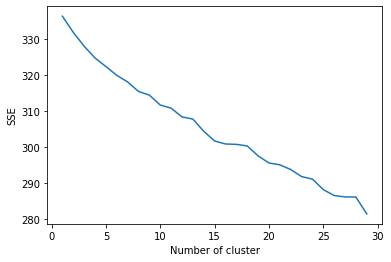

In [ ]:
sse = {}
# Looping over multiple values of k from 1 to 30
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(matrix3)
    data["clusters3"] = kmeans.labels_
    sse[k] = kmeans.inertia_
# Plotting the curve with 'k'-value vs SSE
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

In [ ]:
# true_k, derived from elbow method and confirmed from pluralsight's website
true_k2 = 3
# Running model with 15 different centroid initializations & maximum iterations are 500
model2 = KMeans(n_clusters=true_k2, init='k-means++', max_iter=500, n_init=15)
model2.fit(matrix2)

KMeans(max_iter=500, n_clusters=3, n_init=15)

In [ ]:
# true_k, derived from elbow method and confirmed from pluralsight's website
true_k3 = 15
# Running model with 15 different centroid initializations & maximum iterations are 500
model3 = KMeans(n_clusters=true_k3, init='k-means++', max_iter=500, n_init=15)
model3.fit(matrix3)

KMeans(max_iter=500, n_clusters=15, n_init=15)

## Predict results

In [ ]:
def cluster_predict(str_input, model, tfidf):
    Y = tfidf.transform(list(str_input))
    prediction = model.predict(Y)
    return prediction

In [ ]:
# Create new column for storing predicted categories from our trained model.
data['ClusterPrediction1'] = ""
# Cluster category for each live course
data['ClusterPrediction1']=data.apply(lambda x: cluster_predict(data['concat'], model1, tfidf1), axis=0)

In [ ]:
def recommend_util(str_input, model, tfidf):
    
    # match on the basis course-id and form whole 'Description' entry out of it.
    temp_df = data.loc[data['Cornell Tech Email (Required)'] == str_input]
    student_name = temp_df[['Preferred First Name (Required)', 'Last Name / Family Name (Required)']].agg(' '.join, axis=1)
    str_input = temp_df['concat']
    
    # Predict category of input string category
    prediction_inp = cluster_predict(str_input, model, tfidf)
    prediction_inp = int(prediction_inp)
    # Based on the above prediction 15 random students are recommended from the whole data-frame
    # Recommendation Logic is kept super-simple for current implementation.
    temp_df = data.loc[data['ClusterPrediction1'] == prediction_inp]
    temp_df = temp_df.sample(16)

    temp_df['full name'] = temp_df[['Preferred First Name (Required)', 'Last Name / Family Name (Required)']].agg(' '.join, axis=1)
    
    return list(temp_df['full name']), student_name

**Model 1**

In [ ]:
res, n = recommend_util('myh26@cornell.edu', model1, tfidf1)
lookup_name = ""
result = set()
for x in n:
  lookup_name += x
for name in res:
  if name != lookup_name:
    result.add(name)
for name in result:
  print(name)

Steve Klementowski
Swathi  Ramesh
Omar Alherech
Roberto Bruni
Jenny Juarez
Rohan Divate
Ridhima Sakhuja
Alex Kluver
Bonnie Liu
Jay Chand
Yehao Zhang
Ophir Ehrlich
Grant Lindsley
Brett O'Connor
Brandt Beckerman
Dorothee Grant


In [ ]:
res, n = recommend_util('xd42@cornell.edu', model1, tfidf1)
lookup_name = ""
result = set()
for x in n:
  lookup_name += x
for name in res:
  if name != lookup_name:
    result.add(name)
for name in result:
  print(name)

Jagan Subramanian
Tianyun Zou
Aliya Gangji
Victoria Yang
Graham Estabrook
Andrew Scibelli
Joy Zhao
Janet Liao
Thomas Carroll
Kristen Van Beek
Micah Friedland
Aish Ravindran
Bagus Ruswandi
Dhruv Chhapekar
Christine Shen


In [ ]:
res, n = recommend_util('eh543@cornell.edu', model1, tfidf1)
lookup_name = ""
result = set()
for x in n:
  lookup_name += x
for name in res:
  if name != lookup_name:
    result.add(name)
for name in result:
  print(name)

Hong Xuan Kow
Marie Peeters
Ashray Dimri
Brandon Newman
Jarrett Coleman
Adam Chew
Ethan Otto
Hoang Dang
Anh Ha
Sal Galarza
Richa Vishwakarma
Momina Nofal
Harshitha Arul Murugan
Deepen Kothari
Zack Hurwitz
Gonzalo Ruiz


In [ ]:
res, n = recommend_util('Hp449@cornell.edu', model1, tfidf1)
lookup_name = ""
result = set()
for x in n:
  lookup_name += x
for name in res:
  if name != lookup_name:
    result.add(name)
for name in result:
  print(name)

Khaled Abughoush
Giovanni Trabucco
Itay Fried
Joumana Atara
Amy Wang
Jonathan Yu
Sara Wang
Daniel Levenson
Ogulcan Bayol
Grace Le
Isaac Lichter
Rohan Reddy
Youan Lu
Richard Pan
Zal Joshi
Pamela Capellan


**Model 2**

In [ ]:
res, n = recommend_util('myh26@cornell.edu', model2, tfidf2)
lookup_name = ""
result = set()
for x in n:
  lookup_name += x
for name in res:
  if name != lookup_name:
    result.add(name)
for name in result:
  print(name)

Jackie Peng
Madhu Gengatheran
Escher Campanella
Jess Chen
Abhiraj Gupta
Jinxu Liu
Toby Leung
Maya Lal
So Young Park
Angela Chen
Aria Zhou
Giordana Pulpo
Aarushi Banerjee
Angel Huang
Yiran Wang
Yanjun Zhou


In [ ]:
res, n = recommend_util('xd42@cornell.edu', model2, tfidf2)
lookup_name = ""
result = set()
for x in n:
  lookup_name += x
for name in res:
  if name != lookup_name:
    result.add(name)
for name in result:
  print(name)

Vlad Matsiiako
Marc Agosin
Mitchell Taylor
Yixuan Li
Soul Choi
Hisao Kitamura
Abraham Hill
Shaurya Srivastava
Sylvia Chen
Avinash Bhavnani
Hoyoung Jun
Dennis Liu
Peter Gribizis
Shubhankar Gaikwad
Eric Zhewen Li
Yixuan Qin


In [ ]:
res, n = recommend_util('eh543@cornell.edu', model2, tfidf2)
lookup_name = ""
result = set()
for x in n:
  lookup_name += x
for name in res:
  if name != lookup_name:
    result.add(name)
for name in result:
  print(name)

Vlad Matsiiako
Peter Gribizis
Yixuan Li
Mitchell Taylor
Hisao Kitamura
Shaurya Srivastava
Sylvia Chen
Chandrasekhar Susarla
Avinash Bhavnani
Hoyoung Jun
Dennis Liu
Marc Agosin
Jonathan Porotsky
Ben Stamm
Eric Zhewen Li
Yixuan Qin


In [ ]:
res, n = recommend_util('Hp449@cornell.edu', model2, tfidf2)
lookup_name = ""
result = set()
for x in n:
  lookup_name += x
for name in res:
  if name != lookup_name:
    result.add(name)
for name in result:
  print(name)

Jackie Peng
Abel Aguilar
Martin Sun
Madhu Gengatheran
Tanvi Mishra
Jess Chen
Cassie Lin
Krishangi  Agarwal
Claire  Boguslawski
So Young Park
Jennie Hong
Giordana Pulpo
Aarushi Banerjee
Tingyue Wang
Angel Huang
Tuan (Tony) Dang


**Model 3**

In [ ]:
res, n = recommend_util('myh26@cornell.edu', model3, tfidf3)
lookup_name = ""
result = set()
for x in n:
  lookup_name += x
for name in res:
  if name != lookup_name:
    result.add(name)
for name in result:
  print(name)

olive xie
Ziyu Song
David Li
Yang Song
Lawrence Yu
Zoe Tan
Nomin Sukhbaatar
Lars Kouwenhoven
Yuntian Ye
Andrew Yan
Negar Akbarzadeh
Candice He
Jacob Nadelman
Calvin Ying
Jeanette Xu
Ravi Kumar


In [ ]:
res, n = recommend_util('xd42@cornell.edu', model3, tfidf3)
lookup_name = ""
result = set()
for x in n:
  lookup_name += x
for name in res:
  if name != lookup_name:
    result.add(name)
for name in result:
  print(name)

Jay Jain
Songyu Du
Casey Pan
Yi Liu
Tenghui Zhang
Eric Zhang
Fanruo Gu
Kristjan Tomasson
Marta Jansone
Jiejun Tian
Rashmi Sinha
Sizhi Tan
Xingyu Tao
Panda Xu
Wei Kang Tan
Scarlett Zhang


In [ ]:
res, n = recommend_util('eh543@cornell.edu', model3, tfidf3)
lookup_name = ""
result = set()
for x in n:
  lookup_name += x
for name in res:
  if name != lookup_name:
    result.add(name)
for name in result:
  print(name)

Jonathan Porotsky
Peter Gribizis
Mitchell Taylor
Yixuan Li
Hisao Kitamura
Yizhuo Xie
Sylvia Chen
Chandrasekhar Susarla
Jeremy Hazan
Hoyoung Jun
Dennis Liu
Ramya Kesharwani
Shubhankar Gaikwad
Ben Stamm
Eric Zhewen Li
Marc Agosin


In [ ]:
res, n = recommend_util('Hp449@cornell.edu', model3, tfidf3)
lookup_name = ""
result = set()
for x in n:
  lookup_name += x
for name in res:
  if name != lookup_name:
    result.add(name)
for name in result:
  print(name)

Khaled Abughoush
Giovanni Trabucco
Ritika  Poddar
Itay Fried
Jonathan Yu
Amy Wang
Sara Wang
Mohit Mittal
Anna Pfohl
Shaumik Ashraf
Tim Bernard
Larry Xy
Youan Lu
Richard Pan
Celine Zhang
Pamela Capellan
